# CS541: Applied Machine Learning, Fall 2024, Lab 7

Lab 7 is an exercise that explores Neural Networks. Neural Networks are models inspired by the structure and function of biological neural networks in animal brains. Their capacity to learn from data has far-reaching effects, ranging from revolutionizing technology like natural language processing and self-driving automobiles. They can be used to solve numerious tasks ranging from predicting stock prices, personalize content recommendations and even perform object recognition.

**Lab Grading**

Labs are hands-on exercises designed to provide guided experience in key concepts through this class.  You are graded based on in-lab participation (not correctness), and are not required to submit your lab if you attend in-person.  *Make sure you fill out the attendence form before leaving class*.

For students who miss a lab, you can submit a make-up lab on gradescope by the Friday directly following the lab for partial credit.  Please see the syllabus for the lab grading policy.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

### What are tensors?

Think of them as numpy arrays, but on steroids.

You can do all the operations on them as you can with numpy, but they can also run on GPUs and hold gradient information about the tensor.

Go over some examples here: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

### Implementing Linear regression in Pytorch.

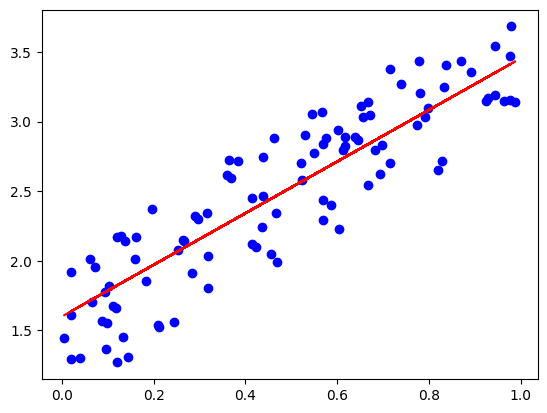

In [ ]:

# Generate random data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.rand(100, 1)

# Convert data to PyTorch tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

# Define the model
model = nn.Linear(1, 1)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training the model
for epoch in range(100):
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plotting the results
plt.scatter(X, y, color='b')
plt.plot(X, model(X_tensor).data.numpy(), color='r')
plt.show()

### Implementing Multi-layer Perceptron - Your first simple neural network

Think of neural networks as a multiple layers of many perceptrons (neurons).
So, you have many neurons and you have sheets of such many neurons stacked together.

Why do we need this?

To be able to fit complicated data - which is most data in real life.

### Let's first make a complicated curve we need to fit.

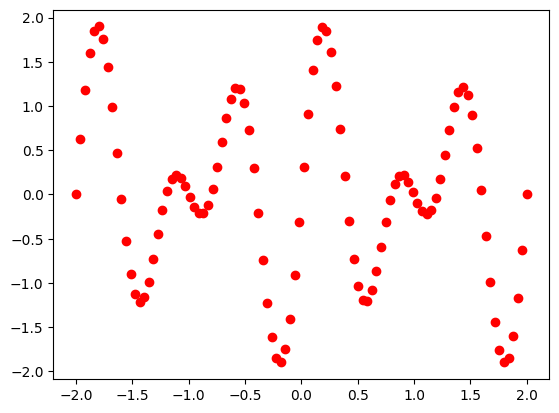

In [ ]:
# Create a complicated curve
X = np.linspace(-2, 2, 100)
y = np.sin(2 * np.pi * X) + np.sin(3 * np.pi * X)

# Convert data to PyTorch tensors
X = torch.from_numpy(X).float().view(-1, 1)
y = torch.from_numpy(y).float().view(-1, 1)

plt.plot(X.numpy(), y.numpy(), 'ro', label='Original data')
plt.show()

### Let's first implement a one-layer perceptron

In [ ]:
# Define the Multi-Layer Perceptron (MLP) model
class OneLayerMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(OneLayerMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)

    def forward(self, x):
        out = self.fc1(x)

        return out

# Set hyperparameters
input_size = 1
hidden_size = 100
output_size = 1
learning_rate = 0.01
num_epochs = 1000

# Initialize the model, loss function, and optimizer
model = OneLayerMLP(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
# Training the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100, 100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [100/1000], Loss: 0.9607
Epoch [200/1000], Loss: 0.9403
Epoch [300/1000], Loss: 0.9401
Epoch [400/1000], Loss: 0.9401
Epoch [500/1000], Loss: 0.9401
Epoch [600/1000], Loss: 0.9401
Epoch [700/1000], Loss: 0.9401
Epoch [800/1000], Loss: 0.9401
Epoch [900/1000], Loss: 0.9401
Epoch [1000/1000], Loss: 0.9401


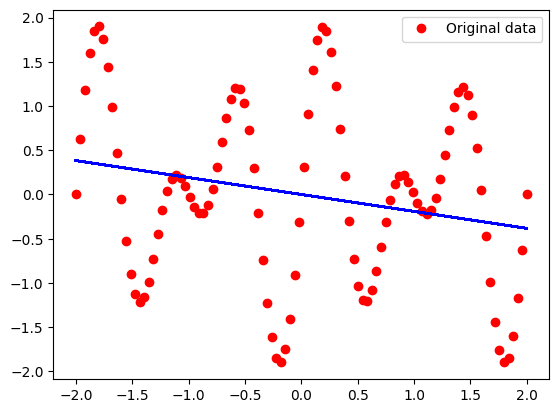

In [ ]:
# Plotting the results
model.eval()
with torch.no_grad():
    predicted = model(X)
    plt.plot(X.numpy(), y.numpy(), 'ro', label='Original data')
    plt.plot(X.numpy(), predicted.numpy(), 'b',)
    plt.legend()
    plt.show()

### Now, let's make multiple layers

In [ ]:
# Define the Multi-Layer Perceptron model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)

        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        a1 = self.fc1(x)

        out = self.fc2(a1)
        return out

# Set hyperparameters
input_size = 1
hidden_size = 100
output_size = 1
learning_rate = 0.01
num_epochs = 1000

# Initialize the model, loss function, and optimizer
model = MLP(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



In [ ]:
# Training the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



Epoch [100/1000], Loss: 0.9401
Epoch [200/1000], Loss: 0.9401
Epoch [300/1000], Loss: 0.9401
Epoch [400/1000], Loss: 0.9401
Epoch [500/1000], Loss: 0.9401
Epoch [600/1000], Loss: 0.9401
Epoch [700/1000], Loss: 0.9401
Epoch [800/1000], Loss: 0.9401
Epoch [900/1000], Loss: 0.9402
Epoch [1000/1000], Loss: 0.9401


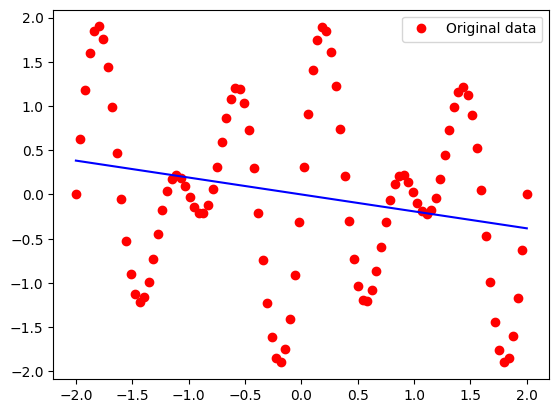

In [ ]:
# Plotting the results
model.eval()
with torch.no_grad():
    predicted = model(X)
    plt.plot(X.numpy(), y.numpy(), 'ro', label='Original data')
    plt.plot(X.numpy(), predicted.numpy(), 'b',)
    plt.legend()
    plt.show()

Did it change the performance? Not really. Why?

Becuase multiple layers of linear functions are still linear.

We need to add some non-linearity to make complicated functions.

### Let's add non-linearity:

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Set hyperparameters
input_size = 1
hidden_size = 100
output_size = 1
learning_rate = 0.01
num_epochs = 1000

# Initialize the model, loss function, and optimizer
model = MLP(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Training the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.6979
Epoch [200/1000], Loss: 0.4505
Epoch [300/1000], Loss: 0.2953
Epoch [400/1000], Loss: 0.2547
Epoch [500/1000], Loss: 0.2416
Epoch [600/1000], Loss: 0.2377
Epoch [700/1000], Loss: 0.2318
Epoch [800/1000], Loss: 0.2305
Epoch [900/1000], Loss: 0.2280
Epoch [1000/1000], Loss: 0.2421


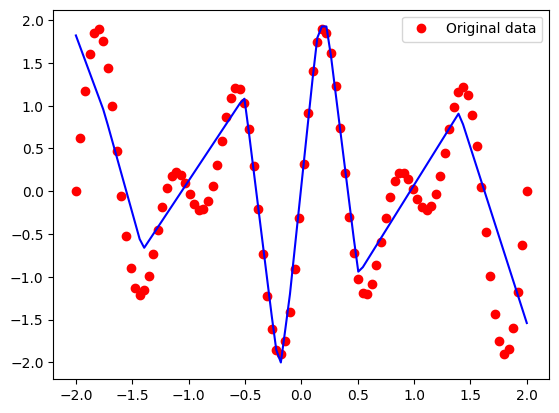

In [ ]:
# Plotting the results
model.eval()
with torch.no_grad():
    predicted = model(X)
    plt.plot(X.numpy(), y.numpy(), 'ro', label='Original data')
    plt.plot(X.numpy(), predicted.numpy(), 'b',)
    plt.legend()
    plt.show()

Neural Networks are extremely powerful at fitting any curve with enough layers.

That is why they are often refered to as universal approximators.

Almost all recent research in AI/deep learning is based on neural nets.


### For you to try:

What happens with more layers?

What happens if you change the ReLU to other non-linear functions? Some common ones to use are Sigmoid, TanH, Leaky ReLU.

Let's see the power of neural nets by playing a fun game:

https://playground.tensorflow.org/



### More resources on neural networks:

- https://www.youtube.com/watch?v=aircAruvnKk - 3Blue 1Brown on neural nets
- Intuition behind why neural nets are so powerful because they hierarchically represent concpets in the layers: https://www.youtube.com/watch?v=hoGvcDfks3w
- Math behind how neural networks optimize the cost function with multiple layers: https://youtu.be/MfIjxPh6Pys?list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU

Now we are going to be working on some real world datasets and you will be implementing your own Neural Networks

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu"); print(device)


cuda:0


In [ ]:

import torch
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(42)

### It might be useful to use this guide for how to train your model https://pytorch.org/tutorials/beginner/introyt/trainingyt.html

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import numpy as np

# Load your dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize your data using the standardscaler we have done previously in lab
scaler =
# Fit and transform your X_train data
X_train = scaler.
# Transform your X_test data
X_test = scaler.

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32)

# Define the neural network model
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        # Define a Linear network with an input size of X_train.shape[1] and output size of 64
        self.fc1 = nn.
        # Define a relu layer
        self.relu_1 = nn.
        #Define a Linear network with an input size of 64 and an output size of 32
        self.fc2 = nn.
        # Define a relu layer
        self.relu_2 = nn.
        #Define a Linear network with an input size of 32 and an output size of 1
        self.fc3 = nn.

    def forward(self, x):
        #Call the first fully connected layer on x
        out = self.
        #Call the first relu layer fully connected layer on out
        out = self.
        #Call the second fully connected layer on out
        out = self.
        #Call the second relu layer fully connected layer on out
        out = self.
        #Call the last fully connected layer on out
        out = self.
        return out

# Create the model
input_size = X_train.shape[1]
model = Net(input_size)

# Define MSE loss function and optimizer
criterion = nn.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model for 100 epochs
epochs =
for epoch in range(epochs):
    avg_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        #Using the setup we had previously, first we zero your gradients for every batch!

        # Make predictions for this batch
        output =
        # Compute the loss and its gradients
        train_loss =

        avg_loss.append(train_loss.item())
        # Adjust learning weights

    if epoch%10 == 0:
      print('Average train loss for ' + str(epoch) + ' epoch: ' + str(np.average(avg_loss)))

# Evaluate the model
model.eval()
with torch.no_grad():
    # Perform predictions on your X_test_tensor using your model
    y_pred =
    # Calculate the loss of your model by using the criterion with the y_pred and y_test_tensor
    test_loss =
    print(f'Test loss: {test_loss.item()}')

Average train loss for 0 epoch: 1.0279164184606815
Average train loss for 10 epoch: 0.30398907099467837
Average train loss for 20 epoch: 0.281926035823286
Average train loss for 30 epoch: 0.27009939672353195
Average train loss for 40 epoch: 0.2612120160731927
Average train loss for 50 epoch: 0.25500254763304725
Average train loss for 60 epoch: 0.25023854069065216
Average train loss for 70 epoch: 0.24716235824333604
Average train loss for 80 epoch: 0.24249355790977792
Average train loss for 90 epoch: 0.24003111397804217
Test loss: 0.26872146129608154


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
breast_cancer = load_breast_cancer()
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
# Now we will split the data into the independent and independent variable
X = breast_cancer.data
y = breast_cancer.target

In [ ]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [ ]:
print(y[:5])
print(np.unique(y))

[0 0 0 0 0]
[0 1]


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




# Standardize your data using the standardscaler we have done previously in lab
scaler =
# Fit and transform your X_train data
X_train = scaler.
# Transform your X_test data
X_test = scaler.

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32)

# Define the neural network model
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        # Define a Linear network with an input size of X_train.shape[1] and output size of 64
        self.fc1 = nn.
        # Define a relu layer
        self.relu_1 = nn.
        #Define a Linear network with an input size of 64 and an output size of 32
        self.fc2 = nn.
        # Define a relu layer
        self.relu_2 = nn.
        #Define a Linear network with an input size of 32 and an output size of 1
        self.fc3 = nn.
        #Define a final layer that uses the sigmoid function
        self.sigmoid = nn.

    def forward(self, x):
        #Call the first fully connected layer on x
        out = self.
        #Call the first relu layer fully connected layer on out
        out = self.
        #Call the second fully connected layer on out
        out = self.
        #Call the second relu layer fully connected layer on out
        out = self.
        #Call the last fully connected layer on out
        out = self.
        #Call the sigmoid layer on out
        out = self.
        return out

# Create the model
input_size = X_train.shape[1]
model = Net(input_size)

# Define loss function and optimizer
criterion = nn.  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model for 100 epochs
epochs =
for epoch in range(epochs):
    avg_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        #Using the setup we had previously, first we zero your gradients for every batch!

        # Make predictions for this batch
        output =
        # Compute the loss and its gradients
        train_loss =

        avg_loss.append(train_loss.item())
        # Adjust learning weights

    if epoch%10 == 0:
      print('Average train loss for ' + str(epoch) + 'epoch: ' + str(np.average(avg_loss)))

# Evaluate the model
model.eval()
with torch.no_grad():
    # Perform predictions on your X_test_tensor using your model
    y_pred =
    # Calculate the loss of your model by using the criterion with the y_pred and y_test_tensor
    print(f'Test loss: {test_loss.item()}')

Average train loss for 0epoch: 0.6931471870495722
Average train loss for 10epoch: 0.6931471870495722
Average train loss for 20epoch: 0.6931471870495722
Average train loss for 30epoch: 0.6931471870495722
Average train loss for 40epoch: 0.6931471870495722
Average train loss for 50epoch: 0.6931471870495722
Average train loss for 60epoch: 0.6931471870495722
Average train loss for 70epoch: 0.6931471870495722
Average train loss for 80epoch: 0.6931471870495722
Average train loss for 90epoch: 0.6931471870495722
Test loss: 0.6931471824645996


In [ ]:
with torch.no_grad():
    model.eval()
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f"Test Accuracy: {accuracy}")

Test Accuracy: 63.0


In [ ]:
def imshow(sample_element, shape = (28, 28)):
    plt.imshow(sample_element[0].numpy().reshape(shape), cmap='gray')
    plt.title('Label = ' + str(sample_element[1]))
    plt.show()

In [ ]:
class Mnist_MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Mnist_MLP, self).__init__()
        # First create a flatten layer
        self.flatten = nn.
        # Define a Linear network with an input size of 784 and output size of 128
        self.fc1 = nn.
        # Define a relu layer
        self.relu1 = nn.
        # Define a Linear network with an input size of 128 and output size of 64
        self.fc2 = nn.
        # Define a relu layer
        self.relu2 = nn.
        # Define a Linear network with an input size of 64 and output size of 10
        self.fc3 = nn.

    def forward(self, x):
        #Call the flatten layer on x
        out = self.
        #Call the first fully connect layer on x
        out = self.
        #Call the first relu layer fully connected layer on out
        out = self.
        #Call the second fully connect layer on x
        out = self.
        #Call the second relu layer fully connected layer on out
        out = self.
        #Call the third fully connect layer on x
        out = self.
        return out

# Set hyperparameters
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.01
num_epochs = 1000

# Initialize the model
model = Mnist_MLP(input_size, hidden_size, output_size)
# Define cross entropy loss function
criterion = nn.
optimizer = torch.optim.SGD(model.parameters(), lr=3e-3, momentum=0.9)

In [ ]:
# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Split the training dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64)


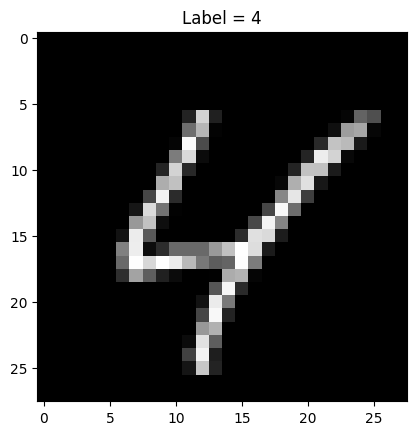

In [ ]:
imshow(train_dataset[0])

In [ ]:


# Training loop
for epoch in range(10):
    for i, (data, target) in enumerate(train_loader):
        #Using the setup we had previously, first we zero your gradients for every batch!

         # Make predictions for this batch
        output =
        # Compute the loss and its gradients
        loss =

        # Adjust learning weights


    # Validation loop
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            val_loss += criterion(output, target).item()

    print(f'Epoch {epoch}, Validation Loss: {val_loss / len(val_loader)}')

# Testing loop
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        # Perform predictions on your data using your model
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

print(f'Test Loss: {test_loss / len(test_loader)}, Accuracy: {100. * correct / len(test_loader.dataset)}%')

Epoch 0, Validation Loss: 0.42067226220635656
Epoch 1, Validation Loss: 0.3164622269253782
Epoch 2, Validation Loss: 0.27144705377360606
Epoch 3, Validation Loss: 0.23883758679507894
Epoch 4, Validation Loss: 0.21361755781826822
Epoch 5, Validation Loss: 0.1932653904040443
Epoch 6, Validation Loss: 0.17655839931536862
Epoch 7, Validation Loss: 0.16249206596787305
Epoch 8, Validation Loss: 0.15126712194227793
Epoch 9, Validation Loss: 0.14184550489199924
Test Loss: 0.13506298438367095, Accuracy: 95.92%


In [ ]:
# Load MNIST dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transforms.ToTensor())

# Split the training dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64)

# Set hyperparameters
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.01
num_epochs = 1000

# Initialize the model, loss function, and optimizer
model = Mnist_MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=3e-3, momentum=0.9)

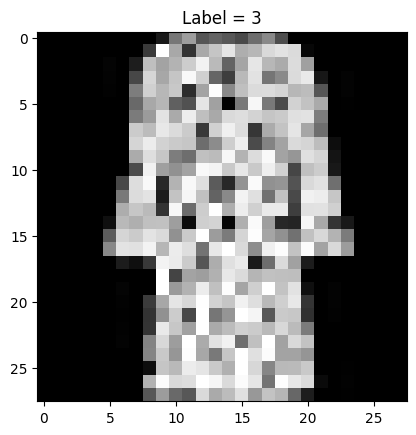

In [ ]:
imshow(train_dataset[4])

In [ ]:
# Training loop
for epoch in range(10):
    for i, (data, target) in enumerate(train_loader):
        #Using the setup we had previously, first we zero your gradients for every batch!

         # Make predictions for this batch
        output =
        # Compute the loss and its gradients
        loss =

        # Adjust learning weights

    # Validation loop
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            val_loss += criterion(output, target).item()

    print(f'Epoch {epoch}, Validation Loss: {val_loss / len(val_loader)}')

# Testing loop
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

print(f'Test Loss: {test_loss / len(test_loader)}, Accuracy: {100. * correct / len(test_loader.dataset)}%')

Epoch 0, Validation Loss: 0.5272308504010769
Epoch 1, Validation Loss: 0.47801057384052176
Epoch 2, Validation Loss: 0.4504413702227968
Epoch 3, Validation Loss: 0.4285126026482024
Epoch 4, Validation Loss: 0.4146554631755707
Epoch 5, Validation Loss: 0.402967437388415
Epoch 6, Validation Loss: 0.3964853580803313
Epoch 7, Validation Loss: 0.3916969451498478
Epoch 8, Validation Loss: 0.389188437702808
Epoch 9, Validation Loss: 0.38582134147749303
Test Loss: 0.39309740560069967, Accuracy: 86.33%
